In [2]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline


In [9]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [10]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [11]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [12]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [3]:
# Data Preperation Module 2
# There are two files in module 2
# Module 2

module2mg = pd.read_csv('Module2-MoodleGrades.csv')

In [4]:
module2ml = pd.read_csv('Module2-MoodleLog.csv')

In [14]:
# Time2
time2 = module2ml["Time"].str.split(",", n = 1, expand = True)


In [15]:
# making separate Date column from new data frame 
module2ml["Date"]= time2[0] 

# making seperate Time column from new data frame
module2ml['Time']= time2[1]


In [16]:
# Convert the date column to datetime64
module2ml.Date = pd.to_datetime(module2ml.Date)


In [17]:
#Remove activity outside semester start and end dates range -Timeedit2
mask2 = (module2ml['Date'] >= StartDate) & (module2ml['Date'] <= EndDate)

module2ml = module2ml.loc[mask2]

len(module2ml)

15794

In [18]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_2 = (module2ml['Date'] >= StartDate) & (module2ml['Date'] <= TriOne)

FirstFive2 = module2ml.loc[week5_2]

len(FirstFive2)


7508

In [19]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_2 = (module2ml['Date'] >= TriOne) & (module2ml['Date'] <= TriTwo)

FirstTen2 = module2ml.loc[week10_2]

len(FirstTen2)


4084

In [20]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_2 = (module2ml['Date'] >= TriTwo) & (module2ml['Date'] <= EndDate)

FirstFivt2 = module2ml.loc[week15_2]

len(FirstFivt2)


4826

In [5]:
print (module2mg.columns.tolist())
# Note Quiz: CA3 - QUIZ  (Real) has a couple of spaces in it

['First name', 'Surname', 'ID number', 'Email address', 'Quiz: CA3 - QUIZ  (Real)', 'Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)', 'Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)', 'Course total (Real)', 'Last downloaded from this course']


In [6]:
# Print the number of unique values in each modul2mg column
print(module2mg.nunique())

First name                                                          138
Surname                                                             138
ID number                                                           138
Email address                                                       138
Quiz: CA3 - QUIZ  (Real)                                             81
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)     18
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)          34
Course total (Real)                                                 118
Last downloaded from this course                                      1
dtype: int64


In [7]:
# Print the number of unique values in each modul2ml column
print(module2ml.nunique())

Time              10003
User full name      138
Affected user         1
Event context        68
Component             9
Event name           25
Description          40
IP address            1
Origin                2
dtype: int64


In [21]:
# Cleanup2
module2ml = module2ml.drop(module2ml[['IP address','Origin','Description','Affected user']], axis=1)

In [22]:
module2ml.dtypes

Time                      object
User full name            object
Event context             object
Component                 object
Event name                object
Date              datetime64[ns]
dtype: object

In [23]:
# new data frame with split value columns 
new2 = module2ml["User full name"].str.split(" ", n = 1, expand = True)


In [24]:
# making separate first name column from new data frame 
module2ml["First name"]= new2[0] 

# making separate last name column from new data frame 
module2ml["Last name"]= new2[1] 


In [25]:
module2ml.dtypes

Time                      object
User full name            object
Event context             object
Component                 object
Event name                object
Date              datetime64[ns]
First name                object
Last name                 object
dtype: object

In [27]:
module2ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc


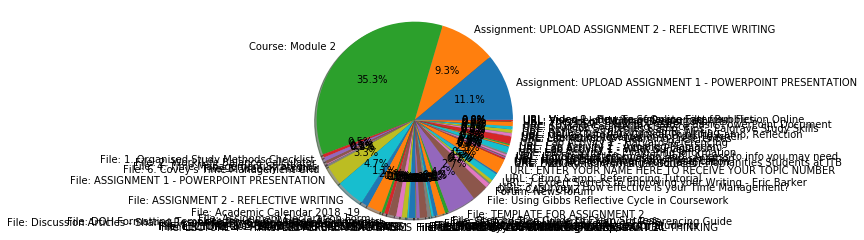

In [28]:
labels = module2ml['Event context'].astype('category').cat.categories.tolist()
counts = module2ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [29]:
module2ml["Event context"].value_counts()
# The Most frequent are assignment: upload assignment 1
# 

Course: Module 2                                                               5576
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION                      1754
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING                           1474
File: ASSIGNMENT 2 - REFLECTIVE WRITING                                         745
File: TEMPLATE FOR ASSIGNMENT 2                                                 727
File: ASSIGNMENT 1 - POWERPOINT PRESENTATION                                    529
File: Using Gibbs Reflective Cycle in Coursework                                426
URL: ENTER YOUR NAME HERE TO RECEIVE YOUR TOPIC NUMBER                          389
File: Assignment Declaration Form                                               387
File: ITB Harvard Referencing Guide                                             206
File: Sample Presentation Layout                                                202
File: Lab Activity 2 - Evaluating Information                               

In [30]:
module2ml["Event name"].value_counts()
# Actions


Course module viewed                                      6916
Course viewed                                             4507
The status of the submission has been viewed.             1508
Submission form viewed.                                    461
Grade user report viewed                                   422
A submission has been submitted.                           317
A file has been uploaded.                                  317
The user has accepted the statement of the submission.     308
Submission created.                                        256
User enrolled in course                                    135
Role assigned                                              135
Course user report viewed                                  126
User list viewed                                            94
Course module instance list viewed                          79
Discussion viewed                                           70
Submission updated.                                    

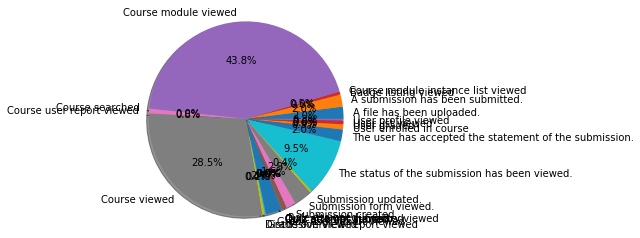

In [32]:
labels = module2ml['Event name'].astype('category').cat.categories.tolist()
counts = module2ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [33]:
m2mg = module2mg[[ 'First name', 'Surname','ID number','Quiz: CA3 - QUIZ  (Real)','Course total (Real)','Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)','Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)']]
#'Quiz: CA3 - QUIZ (Real) , Quiz: CA3 - QUIZ (Real) not in index
# Tidy up on colums without 

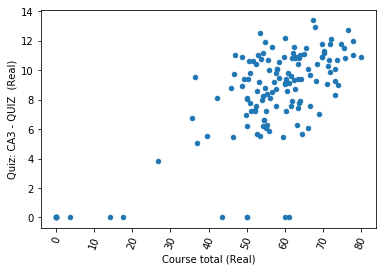

In [34]:
m2mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: CA3 - QUIZ  (Real)', rot=70)


In [35]:
plt.show()

In [37]:
module2ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc


In [38]:
#
#Engaged = > 55
engaged2 = module2mg['Course total (Real)'] > 55


In [39]:

# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module2mg['engaged'] = np.where(module2mg['Course total (Real)']>=55, '1', '0')




In [41]:
module2mg['engaged'] = pd.to_numeric(module2mg['engaged'])

In [42]:
module2mg.head(2)

,First name,Surname,ID number,Email address,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real),Course total (Real),Last downloaded from this course,engaged
0,a8NM,bDqB,U8NMDqBG,U8NMDqBG@student.itb.ie,7.30,13,32,52.30,1548158947,0
1,aSnR,bGk9,VSnRGk9O,VSnRGk9O@student.itb.ie,8.55,10,38,56.55,1548158947,1


In [43]:
disengaged2 = module2mg['Course total (Real)'] < 55

In [44]:
disengaged2.count()

138

In [45]:
engaged2.count()

138

In [46]:
print(module2mg['engaged'].value_counts(dropna=False))

1    84
0    54
Name: engaged, dtype: int64


In [47]:
module2mg.dtypes

First name                                                           object
Surname                                                              object
ID number                                                            object
Email address                                                        object
Quiz: CA3 - QUIZ  (Real)                                            float64
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)      int64
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)           int64
Course total (Real)                                                 float64
Last downloaded from this course                                      int64
engaged                                                               int64
dtype: object

In [48]:
m2mg_subset = module2mg.drop(module2mg[['Email address','Last downloaded from this course']], axis=1)
#dropcolumnsm2mg

In [49]:
m2mg_subset.dtypes

First name                                                           object
Surname                                                              object
ID number                                                            object
Quiz: CA3 - QUIZ  (Real)                                            float64
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)      int64
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)           int64
Course total (Real)                                                 float64
engaged                                                               int64
dtype: object

In [50]:
m2mg_subset.head(2)

,First name,Surname,ID number,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real),Course total (Real),engaged
0,a8NM,bDqB,U8NMDqBG,7.30,13,32,52.30,0
1,aSnR,bGk9,VSnRGk9O,8.55,10,38,56.55,1


In [51]:
Xm2mg = m2mg_subset.iloc[:,3:6]  #independent columns
ym2mg = m2mg_subset.iloc[:,-1]    #target column i.e engaged


In [52]:
Xm2mg.head(2)

,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)
0,7.30,13,32
1,8.55,10,38


In [53]:
ym2mg.head(2)

0    0
1    1
Name: engaged, dtype: int64

In [54]:
#apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(Xm2mg,ym2mg)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm2mg.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                               Specs       Score
2  Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...  255.571899
1  Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT P...   59.808132
0                           Quiz: CA3 - QUIZ  (Real)   33.564287


[ 0.19969996  0.26787527  0.53242477]


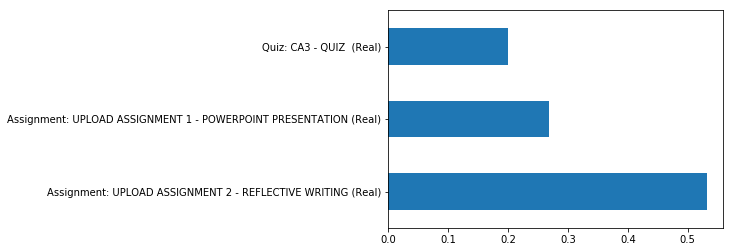

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm2mg,ym2mg)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm2mg.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


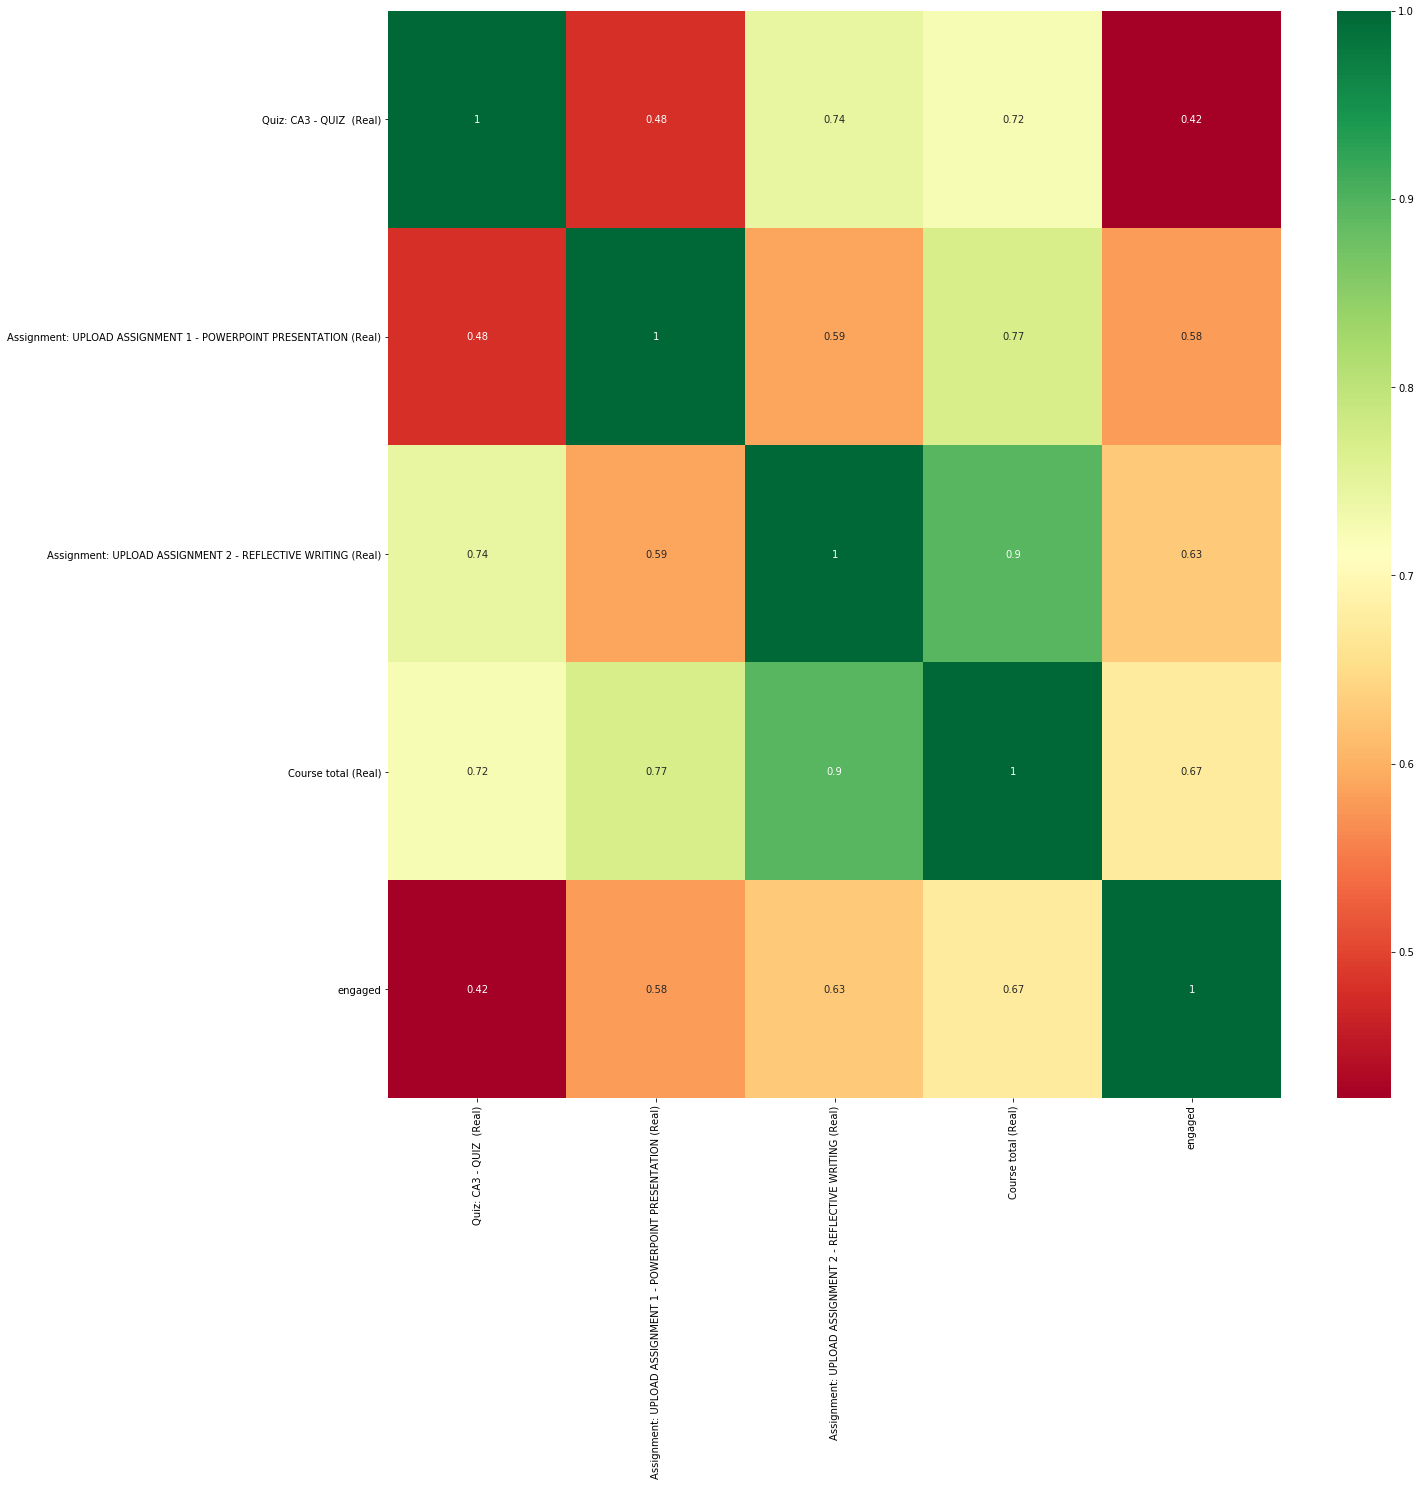

In [56]:
#get correlations of each features in dataset
corrmat = m2mg_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(m2mg_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")



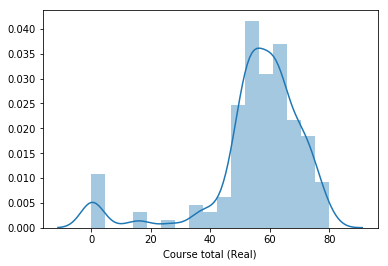

In [57]:
sns.distplot(m2mg['Course total (Real)'])

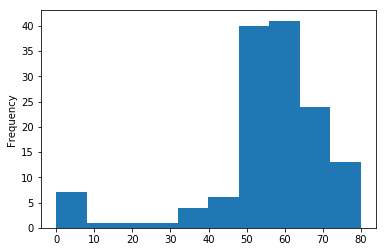

In [63]:
module2mg['Course total (Real)'].plot('hist')

In [59]:
module2ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc


In [64]:
module2ml['Event context'].value_counts(dropna=False).head()

Course: Module 2                                             5576
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION    1754
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING         1474
File: ASSIGNMENT 2 - REFLECTIVE WRITING                       745
File: TEMPLATE FOR ASSIGNMENT 2                               727
Name: Event context, dtype: int64

In [65]:
module2ml['Event name'].value_counts(dropna=False).head()

Course module viewed                             6916
Course viewed                                    4507
The status of the submission has been viewed.    1508
Submission form viewed.                           461
Grade user report viewed                          422
Name: Event name, dtype: int64

In [66]:
module2ml['User full name'].value_counts(dropna=False).head()

an9y b7rk    483
aiG1 bhcI    301
ag2x bJ2S    209
aoJd bWB4    208
ahsi bWD5    207
Name: User full name, dtype: int64

In [60]:
# Selecting columns
m2ml = module2ml[[ 'Time','User full name','Event context','Component','Event name','Date','First name','Last name']]

In [61]:
m2ml.describe().transpose()
# Most frequent student = an9y b7rk
# Course Module 2 most viewed
# 

#Attribute Information:

#Affected user: It contains the name of the user if the action is related to them.This has been removed as it is blank
#Time: It contains the date, month and time stamp of the log entry when it was recorded. (Year infomration may or may not be included)
#User full name: Name of the user is listed in this column.
#Event context: It displays the name of the activity or resource. Ex: Course: Module 2 was most frequent
#Component: It displays the type of the activity or resource. Ex: File, System, Assignment, Quiz ... System was most frequent
#Event name: Displays in relation to users' actions.A user can do CRUD actions in Moodle - Create, View, Update and Delete.Course module viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.This will be removed
#IP address: Shows the IP address of the user.This will be removed as this does not provide any information
#Origin: It indicates whether the user performed an action using a desktop/laptop or mobile. Any user activity from a mobile device will be recorded as 'ws'.


,count,unique,top,freq,first,last
Time,15794,1142,12:07,105,NaN,NaN
User full name,15794,138,an9y b7rk,483,NaN,NaN
Event context,15794,66,Course: Module 2,5576,NaN,NaN
Component,15794,9,File,5091,NaN,NaN
Event name,15794,25,Course module viewed,6916,NaN,NaN
Date,15794,88,2018-10-18 00:00:00,1583,2018-09-18 00:00:00,2019-01-21 00:00:00
First name,15794,138,an9y,483,NaN,NaN
Last name,15794,138,b7rk,483,NaN,NaN


In [62]:
m2ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc


In [68]:
m2mg.head(2)

,First name,Surname,ID number,Quiz: CA3 - QUIZ (Real),Course total (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)
0,a8NM,bDqB,U8NMDqBG,7.30,52.30,13,32
1,aSnR,bGk9,VSnRGk9O,8.55,56.55,10,38


In [69]:
m2mg.describe()

,Quiz: CA3 - QUIZ (Real),Course total (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)
count,138.000000,138.000000,138.000000,138.000000
mean,8.273913,55.665290,11.739130,34.572464
std,3.370353,16.672961,3.897041,12.775940
min,0.000000,0.000000,0.000000,0.000000
25%,7.212500,51.800000,11.000000,32.250000
50%,9.175000,58.100000,12.000000,37.000000
75%,10.737500,64.587500,14.000000,42.000000
max,13.400000,79.900000,19.000000,54.000000


In [ ]:
#
#
#

In [70]:
m2ml_subset = module2ml

In [71]:
module2ml_onehot = m2ml_subset.copy()
module2ml_onehot = pd.get_dummies(module2ml_onehot, columns=['Event name'], prefix = ['Event name'])
module2ml_onehot = pd.get_dummies(module2ml_onehot, columns=['Event context'], prefix = ['Event context'])
module2ml_onehot = pd.get_dummies(module2ml_onehot, columns=['Component'], prefix = ['Component'])


print(module2ml_onehot.head())

### Onehot2
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data

     Time User full name       Date First name Last name  \
4   20:32      ae3w bhew 2019-01-21       ae3w      bhew   
5   17:39      agtk bqpc 2019-01-21       agtk      bqpc   
6   17:37      aiJL bn2Z 2019-01-21       aiJL      bn2Z   
7   17:37      aiJL bn2Z 2019-01-21       aiJL      bn2Z   
8   15:04      aAWa b0mw 2019-01-21       aAWa      b0mw   

   Event name_A file has been uploaded.  \
4                                     0   
5                                     0   
6                                     0   
7                                     0   
8                                     0   

   Event name_A submission has been submitted.  \
4                                            0   
5                                            0   
6                                            0   
7                                            0   
8                                            0   

   Event name_Badge listing viewed  \
4                                0   
5  

In [72]:
module2ml_onehot.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Event context_URL: Video 2 - Beware of Online Filter Bubbles,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report
4,20:32,ae3w bhew,2019-01-21,ae3w,bhew,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,17:39,agtk bqpc,2019-01-21,agtk,bqpc,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [73]:
m2mg_subset.head(2)

,First name,Surname,ID number,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real),Course total (Real),engaged
0,a8NM,bDqB,U8NMDqBG,7.30,13,32,52.30,0
1,aSnR,bGk9,VSnRGk9O,8.55,10,38,56.55,1


In [74]:
#Merge_subset2
merge_subset2 = pd.merge(module2ml_onehot,m2mg_subset[['First name','engaged']],on='First name', how='left')

In [75]:
merge_subset2.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report,engaged
0,20:32,ae3w bhew,2019-01-21,ae3w,bhew,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,17:39,agtk bqpc,2019-01-21,agtk,bqpc,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [76]:
X2s = merge_subset2.iloc[:,5:105]  #independent columns
y2s = merge_subset2.iloc[:,-1]    #target column i.e engaged


In [77]:
y2s.head(2)

0    1
1    1
Name: engaged, dtype: int64

In [78]:
X2s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,...,Event context_URL: Video 2 - Beware of Online Filter Bubbles,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [79]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X2s,y2s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                                Specs      Score
10                Event name_Grade user report viewed  30.568689
99                              Component_User report  30.568689
9             Event name_Grade overview report viewed  26.332493
95                          Component_Overview report  26.332493
50  Event context_File: Lab Activity 2 - Evaluatin...  22.437705
94                                    Component_Forum  18.971810
7                            Event name_Course viewed  17.177583
97                                   Component_System  15.435105
61                    Event context_Forum: News forum  13.731214
83  Event context_URL: Reflective Thinking &amp; W...  11.877787


[  1.07213196e-03   4.33169499e-04   7.27600118e-05   2.79938173e-02
   9.02239700e-03   4.87263227e-03   2.66652080e-03   3.00083897e-02
   5.49408781e-03   4.36914514e-02   4.40909749e-02   1.48712058e-03
   1.40501872e-03   1.61789698e-03   1.38893874e-03   2.49143495e-03
   1.71467369e-03   7.85329097e-04   5.32285945e-03   1.76707417e-02
   1.49297389e-03   1.07666261e-03   1.89497551e-03   3.03741660e-02
   2.50654363e-03   8.02001024e-03   7.23872877e-03   1.54037229e-02
   1.83308746e-02   3.97251174e-02   2.19775842e-02   5.62259490e-03
   5.43810676e-04   2.09317493e-03   2.04376802e-02   2.31528456e-03
   1.93764929e-03   2.70244193e-03   1.43287772e-02   2.81347508e-04
   2.69169823e-02   5.49735279e-03   1.08695041e-04   1.88606047e-03
   3.31706422e-03   3.36738865e-03   6.52500630e-04   1.24636048e-02
   4.91564054e-04   1.69484006e-02   7.81744072e-02   1.97650309e-03
   2.94486718e-03   3.47607844e-04   3.53173855e-03   1.42077241e-02
   2.85796172e-03   6.30748844e-04

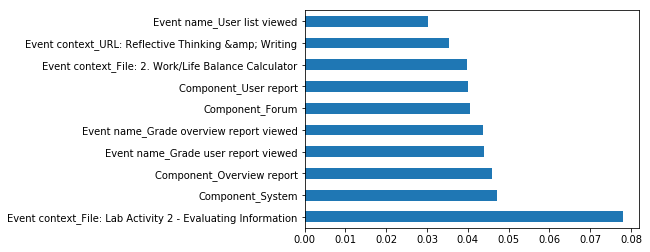

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X2s,y2s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X2s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


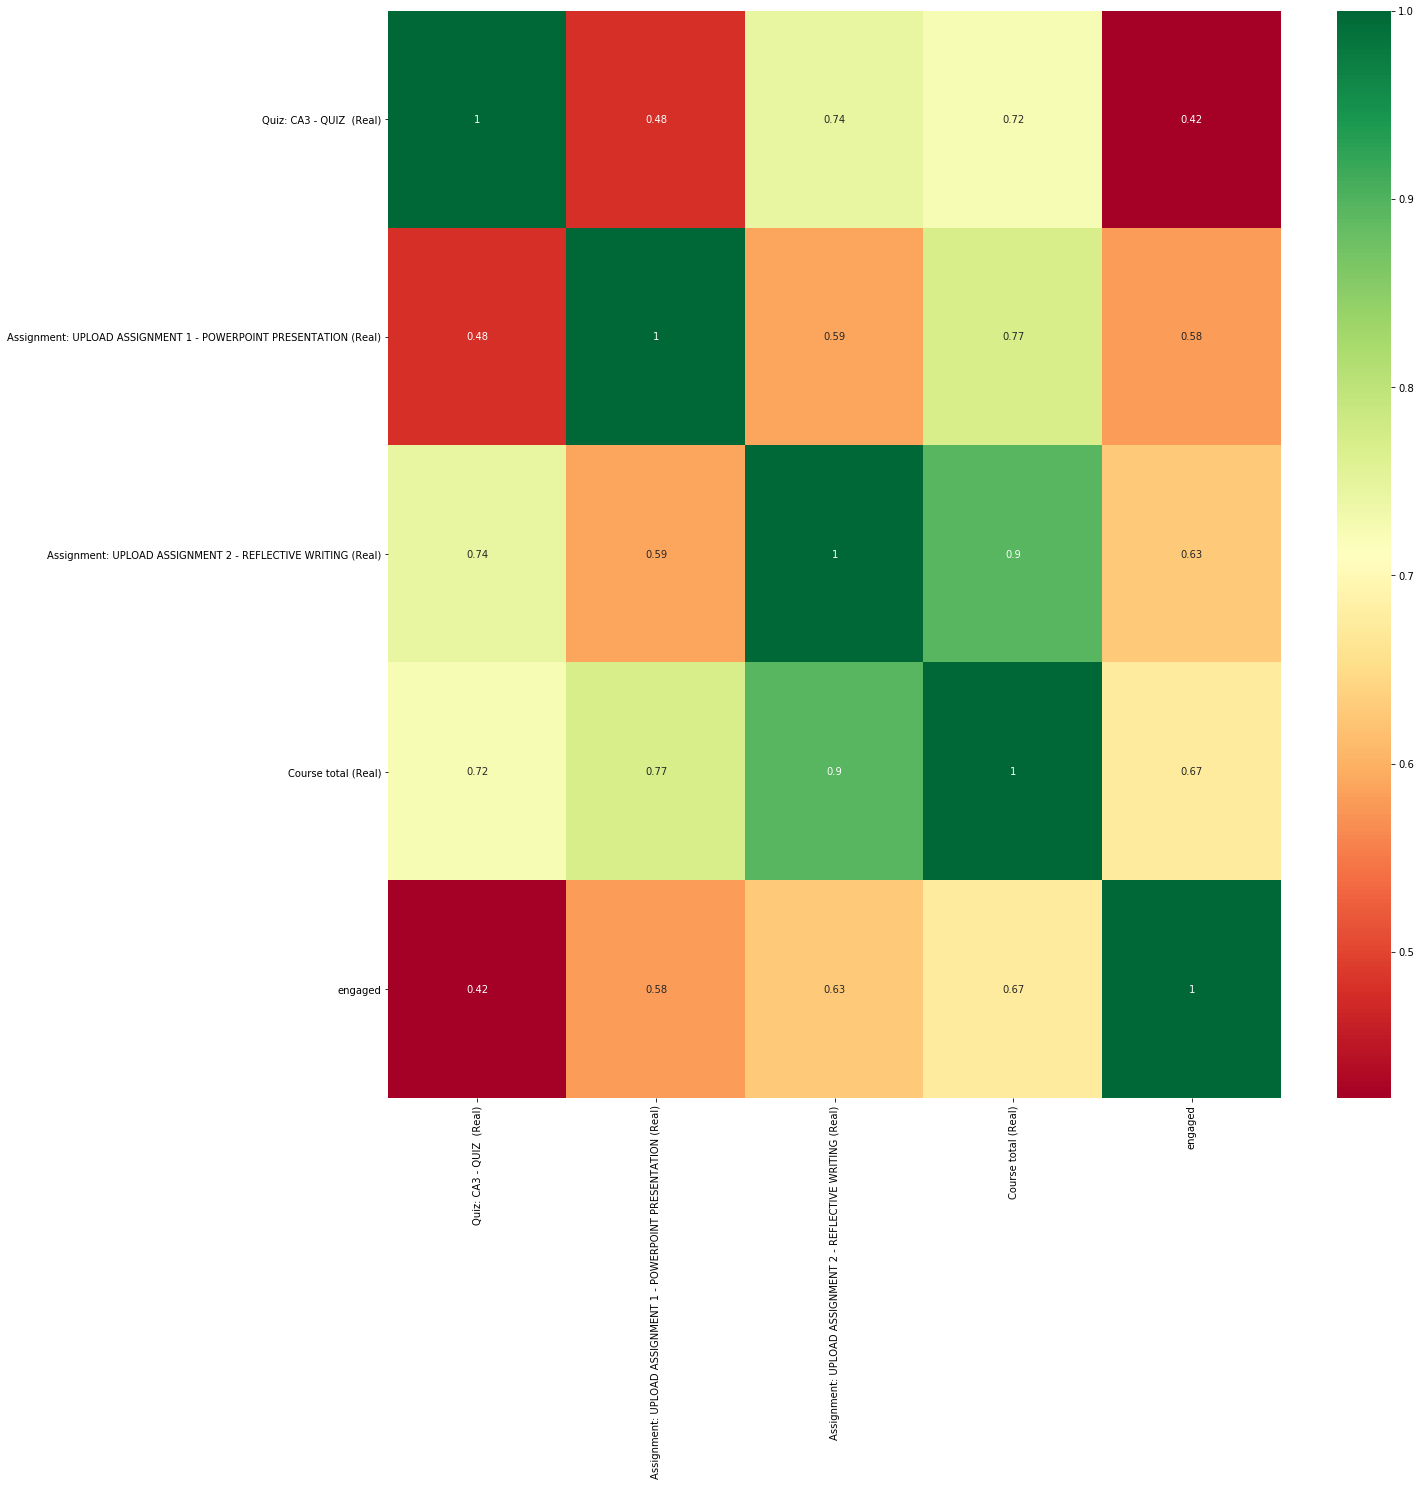

In [81]:
#get correlations of each features in dataset
corrmat = m2mg_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(m2mg_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [82]:
# EndofFS2
##
###
#                       10                Event name_Grade user report viewed  30.568689
#99                              Component_User report  30.568689
#9             Event name_Grade overview report viewed  26.332493
#95                          Component_Overview report  26.332493
#50  Event context_File: Lab Activity 2 - Evaluatin...  22.437705
#94                                    Component_Forum  18.971810
#7                            Event name_Course viewed  17.177583
#97                                   Component_System  15.435105
#61                    Event context_Forum: News forum  13.731214
#83  Event context_URL: Reflective Thinking &amp; W...  11.877787                          

In [83]:
featselect2 = X2s[['Component_User report','Event name_Grade overview report viewed','Component_Overview report','Event context_File: Lab Activity 2 - Evaluating Information','Component_Forum','Event name_Course viewed','Component_System','Event context_Forum: News forum','Event context_URL: Reflective Thinking &amp; Writing']]

In [84]:
featselect2.head(2)

,Component_User report,Event name_Grade overview report viewed,Component_Overview report,Event context_File: Lab Activity 2 - Evaluating Information,Component_Forum,Event name_Course viewed,Component_System,Event context_Forum: News forum,Event context_URL: Reflective Thinking &amp; Writing
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0


In [85]:
Xfs2 = featselect2 # Features
yfs2 = y2s # Target variable


In [86]:
# Split dataset into training set and test set
Xfs2_train, Xfs2_test, yfs2_train, yfs2_test = train_test_split(Xfs2, yfs2, test_size=0.3, random_state=1) # 70% training and 30% test


In [88]:
# Create Decision Tree classifer object
dtclffs2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs2 = dtclffs2.fit(Xfs2_train,yfs2_train)

#Predict the response for test dataset
yfs2_pred = dtclffs2.predict(Xfs2_test)


In [89]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs2_test, yfs2_pred))


Accuracy: 0.634522051066


In [90]:
#Precision Score
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs2_test, yfs2_pred))


0.641014429383


In [91]:
#Recall Score
# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs2_test, yfs2_pred))


0.970218398412


In [92]:
#Accuracy / Precision / Recall
print("Accuracy:",metrics.accuracy_score(yfs2_test, yfs2_pred))
print("Precision:",metrics.precision_score(yfs2_test, yfs2_pred))
print("Recall:",metrics.recall_score(yfs2_test, yfs2_pred))
# Recall: If there are student who are engaged in the test set and your DT model can identify it 98% of the time



Accuracy: 0.634522051066
Precision: 0.641014429383
Recall: 0.970218398412


In [93]:
print("Accuracy:",metrics.accuracy_score(yfs2_test, yfs2_pred))
print("Precision:",metrics.precision_score(yfs2_test, yfs2_pred))
print("Recall:",metrics.recall_score(yfs2_test, yfs2_pred))
print("F1 Score",metrics.f1_score(yfs2_test, yfs2_pred))
# Recall and F1 score are high

Accuracy: 0.634522051066
Precision: 0.641014429383
Recall: 0.970218398412
F1 Score 0.771985255398


In [94]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs2_test, yfs2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs2_test, yfs2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs2_test, yfs2_pred)))

Mean Absolute Error: 0.365477948934
Mean Squared Error: 0.365477948934
Root Mean Squared Error: 0.604547722628


In [96]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs2 = LogisticRegression()

# fit the model with data
logregfs2.fit(Xfs2_train,yfs2_train)

#
ylg2_pred=logregfs2.predict(Xfs2_test)


In [97]:
# import the metrics class
from sklearn import metrics
cnflr2_matrix = metrics.confusion_matrix(yfs2_test, ylg2_pred)
cnflr2_matrix


array([[  75, 1642],
       [  90, 2932]], dtype=int64)

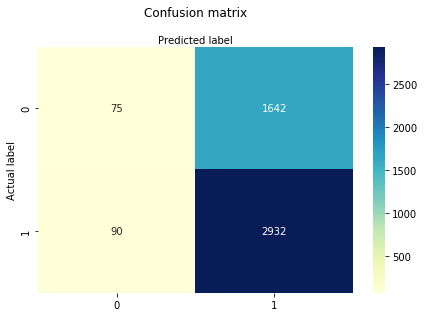

In [98]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr2_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


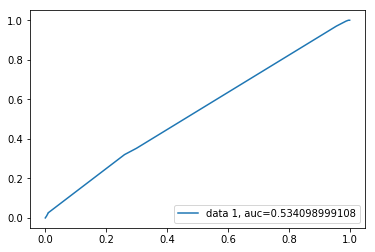

In [99]:
ylg2_pred_proba = logregfs2.predict_proba(Xfs2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs2_test,  ylg2_pred_proba)
auc = metrics.roc_auc_score(yfs2_test, ylg2_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


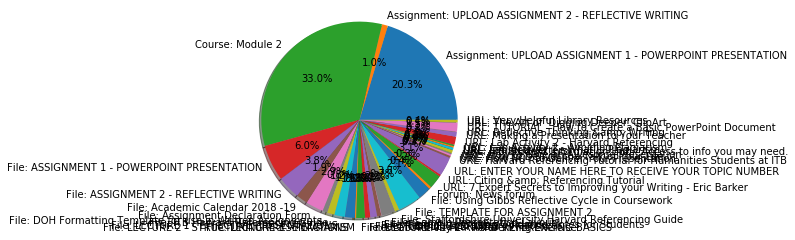

In [100]:
labels = FirstFive2['Event context'].astype('category').cat.categories.tolist()
counts = FirstFive2['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [101]:
FirstFive2["Event context"].value_counts()
# The Most frequent are assignment: upload assignment 1
# 

Course: Module 2                                                    2476
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION           1527
File: ASSIGNMENT 1 - POWERPOINT PRESENTATION                         449
File: TEMPLATE FOR ASSIGNMENT 2                                      289
File: ASSIGNMENT 2 - REFLECTIVE WRITING                              285
URL: ENTER YOUR NAME HERE TO RECEIVE YOUR TOPIC NUMBER               235
File: Assignment Declaration Form                                    218
File: Sample Presentation Layout                                     168
URL: 7 Expert Secrets to Improving your Writing - Eric Barker        166
File: Using Gibbs Reflective Cycle in Coursework                     159
File: Academic Calendar 2018 -19                                     145
File: LECTURE 1 - EFFECTIVE PRESENTATIONS                            129
File: LECTURE 2 - STRUCTURING PRESENTATIONS                          123
URL: TUTORIAL - How to Create a Basic PowerPoint Do

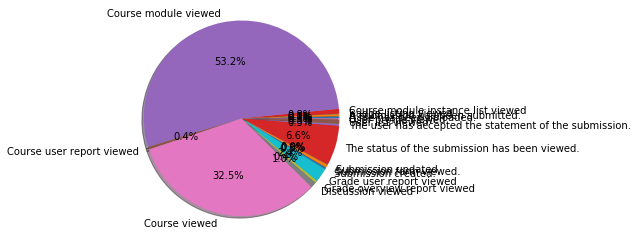

In [102]:
labels = FirstTen2['Event name'].astype('category').cat.categories.tolist()
counts = FirstTen2['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [103]:
FirstTen2["Event context"].value_counts()


Course: Module 2                                                               1528
File: TEMPLATE FOR ASSIGNMENT 2                                                 235
File: ASSIGNMENT 2 - REFLECTIVE WRITING                                         230
File: Lab Activity 2 - Evaluating Information                                   197
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION                       176
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING                            170
URL: Lab Activity 1 - Evaluating Information                                    161
File: Assignment Declaration Form                                               153
File: Using Gibbs Reflective Cycle in Coursework                                149
URL: ENTER YOUR NAME HERE TO RECEIVE YOUR TOPIC NUMBER                          109
URL: Lab Activity 2 - Harvard Referencing                                        91
File: ITB Harvard Referencing Guide                                         